In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2]:
servey = pd.read_csv("data/kaggle_survey_2020_responses.csv")
servey

Time from Start to Finish (seconds)                           Q1  \
0                   Duration (in seconds)  What is your age (# years)?   
1                                    1838                        35-39   
2                                  289287                        30-34   
3                                     860                        35-39   
4                                     507                        30-34   
...                                   ...                          ...   
20032                                 126                        18-21   
20033                                 566                        55-59   
20034                                 238                        30-34   
20035                                 625                        22-24   
20036                                1031                        22-24   

                                           Q2  \
0      What is your gender? - Selected Choice   
1                                         Man   
2                                         Man   
3                                         Man   
4                                         Man   
...                                       ...   
20032                                     Man   
20033                                   Woman   
20034                                     Man   
20035                                     Man   
20036                                     Man   

                                                      Q3  \
0              In which country do you currently reside?   
1                                               Colombia   
2                               United States of America   
3                                              Argentina   
4                               United States of America   
...                                                  ...   
20032                                             Turkey   
20033  United Kingdom of Great Britain and Northern I...   
20034                                             Brazil   
20035                                              India   
20036                                           Pakistan   

                                                      Q4  \
0      What is the highest level of formal education ...   
1                                        Doctoral degree   
2                                        Master’s degree   
3                                      Bachelor’s degree   
4                                        Master’s degree   
...                                                  ...   
20032  Some college/university study without earning ...   
20033                                    Master’s degree   
20034                                    Master’s degree   
20035                                  Bachelor’s degree   
20036                                    Master’s degree   

                                                      Q5  \
0      Select the title most similar to your current ...   
1                                                Student   
2                                          Data Engineer   
3                                      Software Engineer   
4                                         Data Scientist   
...                                                  ...   
20032                                                NaN   
20033                             Currently not employed   
20034                                 Research Scientist   
20035                                  Software Engineer   
20036                          Machine Learning Engineer   

                                                      Q6  \
0      For how many years have you been writing code ...   
1                                             5-10 years   
2                                             5-10 years   
3                                            10-20 years   
4                                             5-10 years   
...  

In [3]:
question = servey.iloc[0]
question

Time from Start to Finish (seconds)                                Duration (in seconds)
Q1                                                           What is your age (# years)?
Q2                                                What is your gender? - Selected Choice
Q3                                             In which country do you currently reside?
Q4                                     What is the highest level of formal education ...
                                                             ...                        
Q35_B_Part_7                           In the next 2 years, do you hope to become mor...
Q35_B_Part_8                           In the next 2 years, do you hope to become mor...
Q35_B_Part_9                           In the next 2 years, do you hope to become mor...
Q35_B_Part_10                          In the next 2 years, do you hope to become mor...
Q35_B_OTHER                            In the next 2 years, do you hope to become mor...
Name: 0, Length: 355,

In [4]:
answer = servey.drop([0])
answer

Time from Start to Finish (seconds)     Q1     Q2  \
1                                    1838  35-39    Man   
2                                  289287  30-34    Man   
3                                     860  35-39    Man   
4                                     507  30-34    Man   
5                                      78  30-34    Man   
...                                   ...    ...    ...   
20032                                 126  18-21    Man   
20033                                 566  55-59  Woman   
20034                                 238  30-34    Man   
20035                                 625  22-24    Man   
20036                                1031  22-24    Man   

                                                      Q3  \
1                                               Colombia   
2                               United States of America   
3                                              Argentina   
4                               United States of America   
5                                                  Japan   
...                                                  ...   
20032                                             Turkey   
20033  United Kingdom of Great Britain and Northern I...   
20034                                             Brazil   
20035                                              India   
20036                                           Pakistan   

                                                      Q4  \
1                                        Doctoral degree   
2                                        Master’s degree   
3                                      Bachelor’s degree   
4                                        Master’s degree   
5                                        Master’s degree   
...                                                  ...   
20032  Some college/university study without earning ...   
20033                                    Master’s degree   
20034                                    Master’s degree   
20035                                  Bachelor’s degree   
20036                                    Master’s degree   

                              Q5           Q6 Q7_Part_1 Q7_Part_2 Q7_Part_3  \
1                        Student   5-10 years    Python         R       SQL   
2                  Data Engineer   5-10 years    Python         R       SQL   
3              Software Engineer  10-20 years       NaN       NaN       NaN   
4                 Data Scientist   5-10 years    Python       NaN       SQL   
5              Software Engineer    3-5 years    Python       NaN       NaN   
...                          ...          ...       ...       ...       ...   
20032                        NaN          NaN       NaN       NaN       NaN   
20033     Currently not employed    20+ years    Python       NaN       NaN   
20034         Research Scientist    < 1 years    Python       NaN       NaN   
20035          Software Engineer    3-5 years    Python       NaN       SQL   
20036  Machine Learning Engineer    < 1 years    Python       NaN       NaN   

       ...        Q35_B_Part_2 Q35_B_Part_3 Q35_B_Part_4   Q35_B_Part_5  \
1      ...                 NaN          NaN          NaN   TensorBoard    
2      ...                 NaN          NaN          NaN            NaN   
3      ...                 NaN          NaN          NaN            NaN   
4      ...                 NaN          NaN          NaN            NaN   
5      ...                 NaN          NaN          NaN            NaN   
...    ...                 ...          ...          ...            ...   
20032  ...                 NaN          NaN          NaN            NaN   
20033  ...                 NaN          NaN          NaN            NaN   
20034  ...                 NaN          NaN          NaN            NaN   
20035  ...   Weights & Biases           NaN          NaN   TensorBoard    
20036  ...   Weights & Biases           NaN          NaN            NaN   

     

* Q1.What is your age

In [5]:
sq1 = pd.DataFrame(servey["Q1"][1:].value_counts())
# sq1.columns = ["Age","Counts"]
sq1

Q1
25-29  4011
22-24  3786
18-21  3469
30-34  2811
35-39  1991
40-44  1397
45-49   988
50-54   698
55-59   411
60-69   398
70+      76

In [6]:
answer["Q1"].value_counts(normalize=True) * 100

25-29    20.018966
22-24    18.895987
18-21    17.313835
30-34    14.029746
35-39     9.937113
40-44     6.972450
45-49     4.931124
50-54     3.483729
55-59     2.051308
60-69     1.986424
70+       0.379317
Name: Q1, dtype: float64

Text(0.5, 1.0, 'What is your age (# years)?')

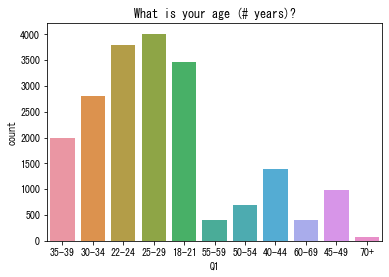

In [7]:
sns.countplot(data=answer, x="Q1")
plt.title(question["Q1"])

In [8]:
#sort_index
answer["Q1"].value_counts().sort_index()

18-21    3469
22-24    3786
25-29    4011
30-34    2811
35-39    1991
40-44    1397
45-49     988
50-54     698
55-59     411
60-69     398
70+        76
Name: Q1, dtype: int64

Text(0.5, 1.0, 'What is your age (# years)?')

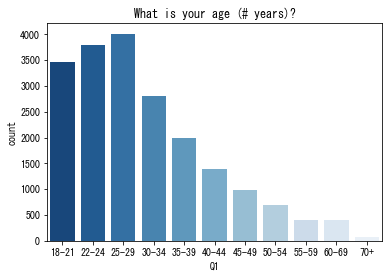

In [9]:
sns.countplot(data=answer.sort_values("Q1"), x="Q1",
             palette="Blues_r").set_title(question["Q1"])

In [10]:
# order by age:
ordered_ages = ["18-21", "22-24", "25-29", "30-34", "35-39", "40-44", 
          "45-49", "50-54", "55-59", "60-69", "70+"]
answer["Q1_1"] = pd.Categorical(answer["Q1"], categories=ordered_ages, ordered=True)
answer["Q1_1"]

1        35-39
2        30-34
3        35-39
4        30-34
5        30-34
         ...  
20032    18-21
20033    55-59
20034    30-34
20035    22-24
20036    22-24
Name: Q1_1, Length: 20036, dtype: category
Categories (11, object): [18-21 < 22-24 < 25-29 < 30-34 ... 50-54 < 55-59 < 60-69 < 70+]

Text(0.5, 1.0, 'What is your age (# years)?')

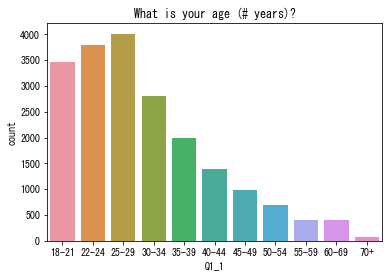

In [11]:
sns.countplot(data=answer, x="Q1_1")
plt.title(question["Q1"])

Q2. What is your gender?

In [12]:
answer["Q2"].value_counts()

Man                        15789
Woman                       3878
Prefer not to say            263
Prefer to self-describe       54
Nonbinary                     52
Name: Q2, dtype: int64

Text(0.5, 1.0, 'What is your gender? - Selected Choice')

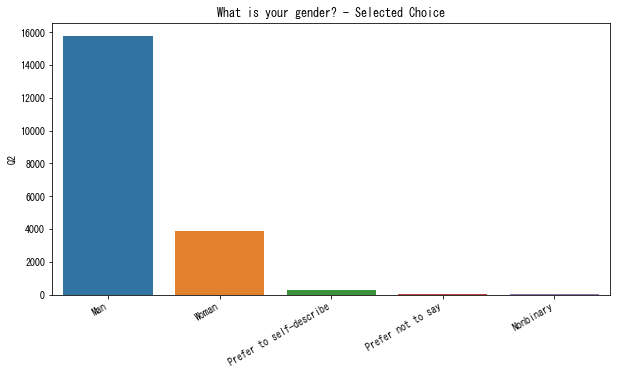

In [13]:
plt.figure(figsize=(10,5))
plt.xticks(rotation = 30, ha = 'right')
sns.barplot(x=answer["Q2"].unique(),y=answer["Q2"].value_counts())
plt.title(question["Q2"])

<AxesSubplot:xlabel='Q2', ylabel='count'>

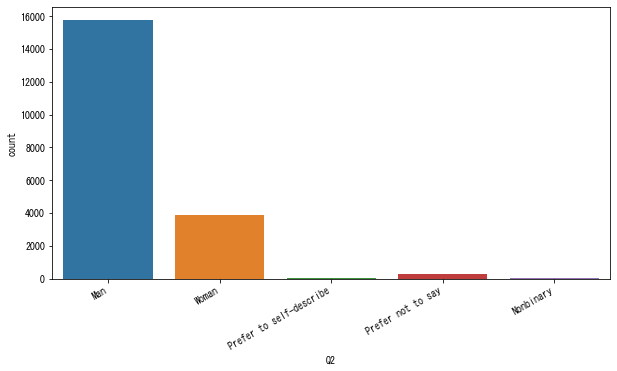

In [14]:
plt.figure(figsize=(10,5))
plt.xticks(rotation = 30, ha = 'right')
sns.countplot(data=answer, x="Q2")

In [119]:
def make_counts(label, fsize=(10,5), order=None):
    if not order:
        order = answer[label].value_counts().index
    plt.figure(figsize=fsize)
    plt.xticks(rotation = 30, ha = 'right')
    sns.countplot(data=answer.sort_values(label),
                  y=label, palette="Blues_r", order=order).set_title(question[label])

In [120]:
answer["Q2"].value_counts().index

Index(['Man', 'Woman', 'Prefer not to say', 'Prefer to self-describe',
       'Nonbinary'],
      dtype='object')

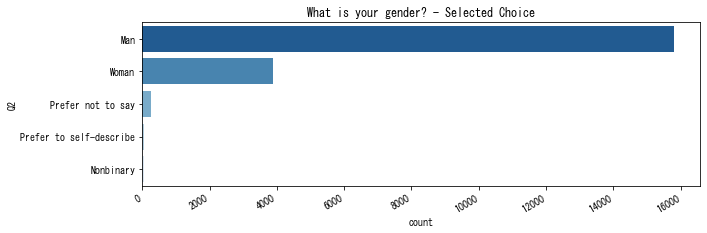

In [121]:
make_counts("Q2",fsize=(10,3))

Q3.In which country do you currently reside?

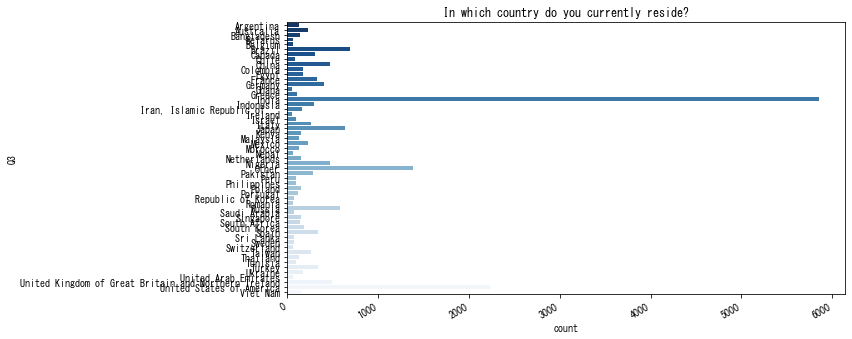

In [18]:
make_counts("Q3")

In [19]:
answer["Q3"].value_counts()

India                                                   5851
United States of America                                2237
Other                                                   1388
Brazil                                                   694
Japan                                                    638
Russia                                                   582
United Kingdom of Great Britain and Northern Ireland     489
Nigeria                                                  476
China                                                    474
Germany                                                  404
Turkey                                                   344
Spain                                                    336
France                                                   330
Canada                                                   301
Indonesia                                                290
Pakistan                                                 283
Taiwan                  

In [20]:
q3 =  pd.DataFrame(answer["Q3"].value_counts())
q3["ratio"] = answer["Q3"].value_counts(normalize=True) * 100
q3

Q3      ratio
India                                               5851  29.202436
United States of America                            2237  11.164903
Other                                               1388   6.927530
Brazil                                               694   3.463765
Japan                                                638   3.184268
Russia                                               582   2.904771
United Kingdom of Great Britain and Northern Ir...   489   2.440607
Nigeria                                              476   2.375724
China                                                474   2.365742
Germany                                              404   2.016371
Turkey                                               344   1.716910
Spain                                                336   1.676981
France                                               330   1.647035
Canada                                               301   1.502296
Indonesia                                            290   1.447395
Pakistan                                             283   1.412458
Taiwan                                               267   1.332601
Italy                                                267   1.332601
Australia                                            231   1.152925
Mexico                                               227   1.132961
South Korea                                          190   0.948293
Egypt                                                179   0.893392
Colombia                                             177   0.883410
Ukraine                                              170   0.848473
Iran, Islamic Republic of...                         162   0.808545
Kenya                                                153   0.763625
Netherlands                                          151   0.753643
Singapore                                            149   0.743661
Poland                                               148   0.738670
Viet Nam                                             147   0.733679
Bangladesh                                           143   0.713715
South Africa                                         141   0.703733
Argentina                                            134   0.668796
Malaysia                                             133   0.663805
Morocco                                              133   0.663805
Thailand                                             132   0.658814
Portugal                                             122   0.608904
Greece                                               111   0.554003
Philippines                                           99   0.494111
Tunisia                                               99   0.494111
Israel                                                97   0.484129
Peru                                                  95   0.474147
Chile                                                 85   0.424236
Sweden                                                78   0.389299
Republic of Korea                                     76   0.379317
Saudi Arabia                                          76   0.379317
Sri Lanka                                             72   0.359353
Switzerland                                           68   0.339389
Nepal                                                 62   0.309443
Romania                                               61   0.304452
Belgium                                               60   0.299461
Belarus                                               59   0.294470
United Arab Emirates                                  59   0.294470
Ireland                                               54   0.269515
Ghana                                                 52   0.259533

In [21]:
q3.index

Index(['India', 'United States of America', 'Other', 'Brazil', 'Japan',
       'Russia', 'United Kingdom of Great Britain and Northern Ireland',
       'Nigeria', 'China', 'Germany', 'Turkey', 'Spain', 'France', 'Canada',
       'Indonesia', 'Pakistan', 'Taiwan', 'Italy', 'Australia', 'Mexico',
       'South Korea', 'Egypt', 'Colombia', 'Ukraine',
       'Iran, Islamic Republic of...', 'Kenya', 'Netherlands', 'Singapore',
       'Poland', 'Viet Nam', 'Bangladesh', 'South Africa', 'Argentina',
       'Malaysia', 'Morocco', 'Thailand', 'Portugal', 'Greece', 'Philippines',
       'Tunisia', 'Israel', 'Peru', 'Chile', 'Sweden', 'Republic of Korea',
       'Saudi Arabia', 'Sri Lanka', 'Switzerland', 'Nepal', 'Romania',
       'Belgium', 'Belarus', 'United Arab Emirates', 'Ireland', 'Ghana'],
      dtype='object')

In [22]:
# pie plot
fig = px.pie(q3,
             values='Q3',
             names = q3.index,
             title=question["Q3"])
fig.update_traces(textposition='inside', textinfo='value+percent+label')
fig.show()

In [23]:
29.2+11.2+6.94

47.339999999999996

Q4.What is the highest level of formal education that you have attained or plan to attain within the next 2
years?

In [24]:
answer["Q4"].value_counts()

Master’s degree                                                      7859
Bachelor’s degree                                                    6978
Doctoral degree                                                      2302
Some college/university study without earning a bachelor’s degree    1092
Professional degree                                                   699
I prefer not to answer                                                399
No formal education past high school                                  240
Name: Q4, dtype: int64

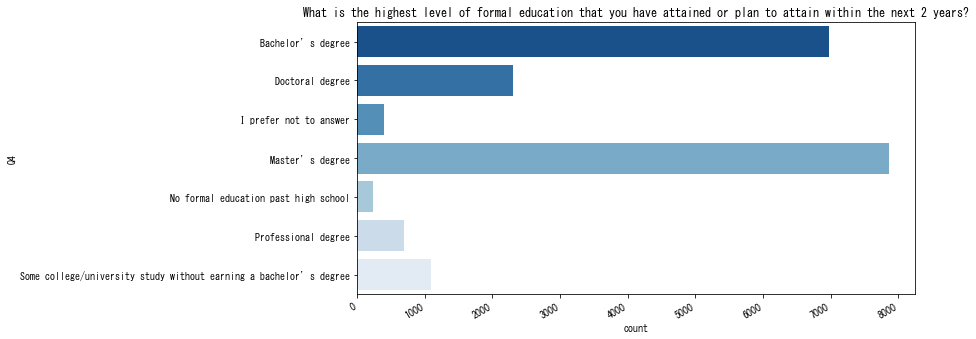

In [25]:
make_counts("Q4")

In [26]:
answer[["Q1","Q2","Q3","Q4","Q5","Q6"]].isnull().sum()

Q1      0
Q2      0
Q3      0
Q4    467
Q5    759
Q6    916
dtype: int64

In [27]:
answer.loc[answer["Q4"].isnull()]
# 20036 - 19569

Time from Start to Finish (seconds)     Q1     Q2  \
132                                    54  35-39  Woman   
306                                    36  22-24    Man   
321                                    31  25-29    Man   
405                                    72  25-29    Man   
419                                    41  22-24    Man   
...                                   ...    ...    ...   
19688                               85336  30-34    Man   
19709                                 124  18-21    Man   
19834                                1826  35-39    Man   
19893                                  41  45-49    Man   
19925                                  30  18-21    Man   

                             Q3   Q4   Q5   Q6 Q7_Part_1 Q7_Part_2 Q7_Part_3  \
132                       India  NaN  NaN  NaN       NaN       NaN       NaN   
306                       India  NaN  NaN  NaN       NaN       NaN       NaN   
321                  Bangladesh  NaN  NaN  NaN       NaN       NaN       NaN   
405                    Thailand  NaN  NaN  NaN       NaN       NaN       NaN   
419                       China  NaN  NaN  NaN       NaN       NaN       NaN   
...                         ...  ...  ...  ...       ...       ...       ...   
19688  United States of America  NaN  NaN  NaN       NaN       NaN       NaN   
19709                    Poland  NaN  NaN  NaN       NaN       NaN       NaN   
19834                     Egypt  NaN  NaN  NaN       NaN       NaN       NaN   
19893                     Japan  NaN  NaN  NaN       NaN       NaN       NaN   
19925                   Ukraine  NaN  NaN  NaN       NaN       NaN       NaN   

       ... Q35_B_Part_3 Q35_B_Part_4 Q35_B_Part_5 Q35_B_Part_6 Q35_B_Part_7  \
132    ...          NaN          NaN          NaN          NaN          NaN   
306    ...          NaN          NaN          NaN          NaN          NaN   
321    ...          NaN          NaN          NaN          NaN          NaN   
405    ...          NaN          NaN          NaN          NaN          NaN   
419    ...          NaN          NaN          NaN          NaN          NaN   
...    ...          ...          ...          ...          ...          ...   
19688  ...          NaN          NaN          NaN          NaN          NaN   
19709  ...          NaN          NaN          NaN          NaN          NaN   
19834  ...          NaN          NaN          NaN          NaN          NaN   
19893  ...          NaN          NaN          NaN          NaN          NaN   
19925  ...          NaN          NaN          NaN          NaN          NaN   

      Q35_B_Part_8 Q35_B_Part_9 Q35_B_Part_10 Q35_B_OTHER   Q1_1  
132            NaN          NaN           NaN         NaN  35-39  
306            NaN          NaN           NaN         NaN  22-24  
321            NaN          NaN           NaN         NaN  25-29  
405            NaN          NaN           NaN         NaN  25-29  
419            NaN          NaN           NaN         NaN  22-24  
...            ...          ...           ...         ...    ...  
19688          NaN          NaN           NaN         NaN  30-34  
19709          NaN          NaN           NaN         NaN  18-21  
19834          NaN          NaN           NaN         NaN  35-39  
19893          NaN          NaN           NaN         NaN  45-49  
19925          NaN          NaN           NaN         NaN  18-21  

[467 rows x 356 columns]

In [28]:
answer["Q4_1"] = answer["Q4"].isnull()

In [29]:
japan = answer.query("Q3 == 'Japan'")
korea = answer.query("Q3 == 'South Korea'")
jako = answer.query("Q3 == 'South Korea' | Q3 == 'Japan'")

In [30]:
jako

Time from Start to Finish (seconds)     Q1     Q2           Q3  \
5                                      78  30-34    Man        Japan   
39                                    592  25-29    Man  South Korea   
123                                    70  50-54    Man        Japan   
192                                  1553  22-24  Woman        Japan   
232                                   537  60-69    Man        Japan   
...                                   ...    ...    ...          ...   
19847                                 938  50-54    Man        Japan   
19893                                  41  45-49    Man        Japan   
19918                                 652  18-21    Man        Japan   
19919                                5524  35-39    Man        Japan   
19968                                 416  30-34    Man  South Korea   

                                                      Q4  \
5                                        Master’s degree   
39                                       Master’s degree   
123                                      Master’s degree   
192    Some college/university study without earning ...   
232                                      Master’s degree   
...                                                  ...   
19847                                    Master’s degree   
19893                                                NaN   
19918                                  Bachelor’s degree   
19919  Some college/university study without earning ...   
19968                                  Bachelor’s degree   

                            Q5           Q6 Q7_Part_1 Q7_Part_2 Q7_Part_3  \
5            Software Engineer    3-5 years    Python       NaN       NaN   
39      Currently not employed   5-10 years    Python         R       NaN   
123                        NaN          NaN       NaN       NaN       NaN   
192          Software Engineer   5-10 years    Python         R       SQL   
232    Product/Project Manager    < 1 years    Python       NaN       NaN   
...                        ...          ...       ...       ...       ...   
19847        Software Engineer    20+ years    Python       NaN       NaN   
19893                      NaN          NaN       NaN       NaN       NaN   
19918                  Student    1-2 years    Python         R       NaN   
19919        Software Engineer  10-20 years    Python       NaN       NaN   
19968             Data Analyst    1-2 years    Python       NaN       SQL   

       ... Q35_B_Part_4   Q35_B_Part_5 Q35_B_Part_6 Q35_B_Part_7 Q35_B_Part_8  \
5      ...          NaN            NaN          NaN          NaN          NaN   
39     ...          NaN   TensorBoard           NaN          NaN          NaN   
123    ...          NaN            NaN          NaN          NaN          NaN   
192    ...          NaN   TensorBoard           NaN          NaN          NaN   
232    ...          NaN            NaN          NaN          NaN          NaN   
...    ...          ...            ...          ...          ...          ...   
19847  ...          NaN            NaN          NaN          NaN          NaN   
19893  ...          NaN            NaN          NaN          NaN          NaN   
19918  ...          NaN            NaN          NaN          NaN          NaN   
19919  ...          NaN            NaN          NaN          NaN          NaN   
19968  ...          NaN            NaN          NaN          NaN          NaN   

      Q35_B_Part_9 Q35_B_Part_10 Q35_B_OTHER   Q1_1   Q4_1  
5              NaN           NaN         NaN  30-34  False  
39             NaN           NaN         NaN  25-29  False  
123            NaN           NaN         NaN  50-54  False  
192            NaN           NaN         NaN  22-24  False  
232            NaN           NaN         NaN  60-69  False  
...            ...           ...         ...    ...    ...  
19847          NaN           NaN         NaN  50-54  False  
19893          NaN           NaN  

Text(0.5, 1.0, 'What is your age (# years)?')

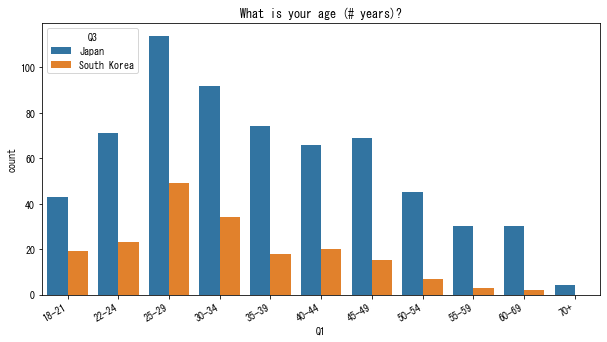

In [31]:
plt.figure(figsize=(10,5))
plt.xticks(rotation = 30, ha = 'right')
sns.countplot(data=jako.sort_values("Q1"), x="Q1", hue="Q3").set_title(question["Q1"])

In [32]:
# hue_order = ["qq","South Korea","Japan"]
# plt.figure(figsize=(20,5))
# plt.xticks(rotation = 30, ha = 'right')
# sns.countplot(data=jako.sort_values("Q1"), x="Q1",hue="Q3" ,hue_order=hue_order).set_title(question["Q1"])

Q5.Select the title most similar to your current role (or most recent title if retired):

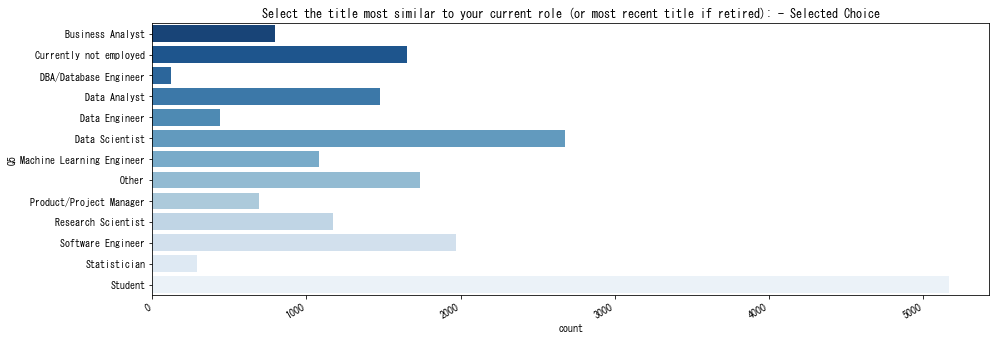

In [33]:
make_counts("Q5", fsize=(15,5))

Q6.For how many years have you been writing code and/or programming?

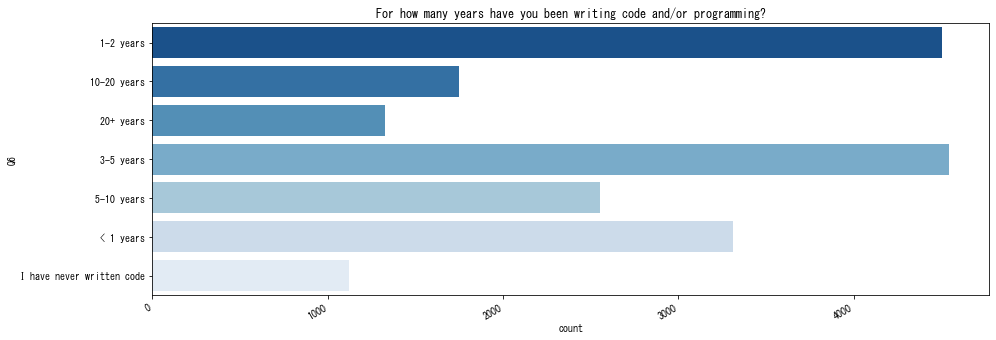

In [34]:
make_counts("Q6", fsize=(15,5))

In [35]:
q6_cols = answer["Q6"].value_counts().index.tolist()
q6_cols 

['3-5 years',
 '1-2 years',
 '< 1 years',
 '5-10 years',
 '10-20 years',
 '20+ years',
 'I have never written code']

<AxesSubplot:xlabel='Q6', ylabel='count'>

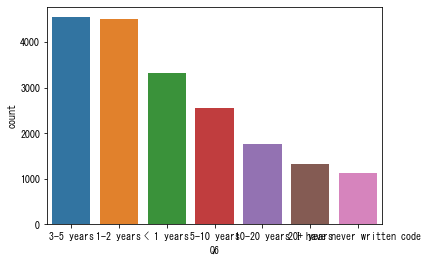

In [36]:
sns.countplot(data=answer, x= "Q6", order=q6_cols)

Q7.What programming languages do you use on a regular basis? (Select all that apply)

In [37]:
answer_Q7 = answer.filter(regex="Q7")
answer_Q7

Q7_Part_1 Q7_Part_2 Q7_Part_3 Q7_Part_4 Q7_Part_5 Q7_Part_6   Q7_Part_7  \
1        Python         R       SQL         C       NaN       NaN  Javascript   
2        Python         R       SQL       NaN       NaN       NaN         NaN   
3           NaN       NaN       NaN       NaN       NaN      Java  Javascript   
4        Python       NaN       SQL       NaN       NaN       NaN         NaN   
5        Python       NaN       NaN       NaN       NaN       NaN         NaN   
...         ...       ...       ...       ...       ...       ...         ...   
20032       NaN       NaN       NaN       NaN       NaN       NaN         NaN   
20033    Python       NaN       NaN       NaN       NaN       NaN         NaN   
20034    Python       NaN       NaN       NaN       NaN       NaN         NaN   
20035    Python       NaN       SQL         C       NaN      Java  Javascript   
20036    Python       NaN       NaN       NaN       NaN       NaN         NaN   

      Q7_Part_8 Q7_Part_9 Q7_Part_10 Q7_Part_11 Q7_Part_12 Q7_OTHER  
1           NaN       NaN        NaN     MATLAB        NaN    Other  
2           NaN       NaN        NaN        NaN        NaN      NaN  
3           NaN       NaN       Bash        NaN        NaN      NaN  
4           NaN       NaN       Bash        NaN        NaN      NaN  
5           NaN       NaN        NaN        NaN        NaN      NaN  
...         ...       ...        ...        ...        ...      ...  
20032       NaN       NaN        NaN        NaN        NaN      NaN  
20033       NaN       NaN        NaN        NaN        NaN      NaN  
20034       NaN       NaN        NaN        NaN        NaN      NaN  
20035       NaN       NaN        NaN        NaN        NaN      NaN  
20036       NaN       NaN        NaN        NaN        NaN      NaN  

[20036 rows x 13 columns]

In [38]:
q7_titile = question.filter(regex="Q7")[0].split("-")[0]

In [39]:
answer_Q7_desc = answer_Q7.describe()
answer_Q7_desc

Q7_Part_1 Q7_Part_2 Q7_Part_3 Q7_Part_4 Q7_Part_5 Q7_Part_6  \
count      15530      4277      7535      3315      3827      3367   
unique         1         1         1         1         1         1   
top       Python         R       SQL         C       C++      Java   
freq       15530      4277      7535      3315      3827      3367   

         Q7_Part_7 Q7_Part_8 Q7_Part_9 Q7_Part_10 Q7_Part_11 Q7_Part_12  \
count         2995       262       198       1776       2217        206   
unique           1         1         1          1          1          1   
top     Javascript     Julia     Swift       Bash     MATLAB       None   
freq          2995       262       198       1776       2217        206   

       Q7_OTHER  
count      1945  
unique        1  
top       Other  
freq       1945

<AxesSubplot:xlabel='top'>

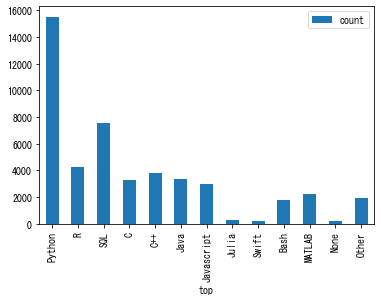

In [40]:
answer_Q7_desc.loc[["top","count"]].T.set_index("top").plot.bar()

In [41]:
answer_Q7_count = answer_Q7_desc.loc[["top","count"]].T
answer_Q7_count = answer_Q7_count.set_index("top")
answer_Q7_count = answer_Q7_count.sort_values("count", ascending=False)
answer_Q7_count

count
top              
Python      15530
SQL          7535
R            4277
C++          3827
Java         3367
C            3315
Javascript   2995
MATLAB       2217
Other        1945
Bash         1776
Julia         262
None          206
Swift         198

In [42]:
answer_Q7_countP = answer_Q7_desc.loc[["top","count"]].T
answer_Q7_countP

top  count
Q7_Part_1       Python  15530
Q7_Part_2            R   4277
Q7_Part_3          SQL   7535
Q7_Part_4            C   3315
Q7_Part_5          C++   3827
Q7_Part_6         Java   3367
Q7_Part_7   Javascript   2995
Q7_Part_8        Julia    262
Q7_Part_9        Swift    198
Q7_Part_10        Bash   1776
Q7_Part_11      MATLAB   2217
Q7_Part_12        None    206
Q7_OTHER         Other   1945

<AxesSubplot:xlabel='top', ylabel='count'>

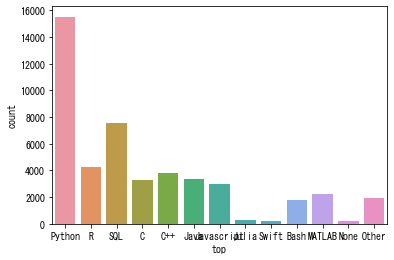

In [43]:
sns.barplot(data=answer_Q7_countP, x="top", y="count")

In [44]:
answer

Time from Start to Finish (seconds)     Q1     Q2  \
1                                    1838  35-39    Man   
2                                  289287  30-34    Man   
3                                     860  35-39    Man   
4                                     507  30-34    Man   
5                                      78  30-34    Man   
...                                   ...    ...    ...   
20032                                 126  18-21    Man   
20033                                 566  55-59  Woman   
20034                                 238  30-34    Man   
20035                                 625  22-24    Man   
20036                                1031  22-24    Man   

                                                      Q3  \
1                                               Colombia   
2                               United States of America   
3                                              Argentina   
4                               United States of America   
5                                                  Japan   
...                                                  ...   
20032                                             Turkey   
20033  United Kingdom of Great Britain and Northern I...   
20034                                             Brazil   
20035                                              India   
20036                                           Pakistan   

                                                      Q4  \
1                                        Doctoral degree   
2                                        Master’s degree   
3                                      Bachelor’s degree   
4                                        Master’s degree   
5                                        Master’s degree   
...                                                  ...   
20032  Some college/university study without earning ...   
20033                                    Master’s degree   
20034                                    Master’s degree   
20035                                  Bachelor’s degree   
20036                                    Master’s degree   

                              Q5           Q6 Q7_Part_1 Q7_Part_2 Q7_Part_3  \
1                        Student   5-10 years    Python         R       SQL   
2                  Data Engineer   5-10 years    Python         R       SQL   
3              Software Engineer  10-20 years       NaN       NaN       NaN   
4                 Data Scientist   5-10 years    Python       NaN       SQL   
5              Software Engineer    3-5 years    Python       NaN       NaN   
...                          ...          ...       ...       ...       ...   
20032                        NaN          NaN       NaN       NaN       NaN   
20033     Currently not employed    20+ years    Python       NaN       NaN   
20034         Research Scientist    < 1 years    Python       NaN       NaN   
20035          Software Engineer    3-5 years    Python       NaN       SQL   
20036  Machine Learning Engineer    < 1 years    Python       NaN       NaN   

       ... Q35_B_Part_4   Q35_B_Part_5 Q35_B_Part_6 Q35_B_Part_7 Q35_B_Part_8  \
1      ...          NaN   TensorBoard           NaN          NaN          NaN   
2      ...          NaN            NaN          NaN          NaN          NaN   
3      ...          NaN            NaN          NaN          NaN          NaN   
4      ...          NaN            NaN          NaN          NaN          NaN   
5      ...          NaN            NaN          NaN          NaN          NaN   
...    ...          ...            ...          ...          ...          ...   
20032  ...          NaN            NaN          NaN          NaN          NaN   
20033  ...          NaN            NaN          NaN          NaN          NaN   
20034  ...          NaN            NaN          NaN          NaN          NaN   
20035  ...          NaN   TensorBoard           NaN          NaN      Trains    
20036  ...     

Text(0.5, 1.0, 'What programming languages do you use on a regular basis? (Select all that apply) ')

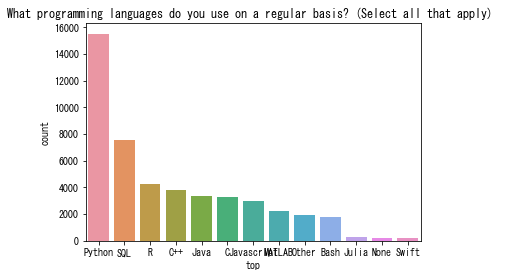

In [45]:
sns.barplot(data=answer_Q7_count,y="count",x=answer_Q7_count.index).set_title(q7_titile)

## Define get_question_title_function

In [46]:
answer.filter(regex="Q7").columns[0]

'Q7_Part_1'

In [47]:
def get_question_title_by_qno(qno):
    if qno in question.index:
        return question[qno]
    else:
        q_no = answer.filter(regex=qno).columns[0]
        q_no = question[q_no].split("-")[0]
        return q_no

In [48]:
get_question_title_by_qno("Q11")

'What type of computing platform do you use most often for your data science projects? - Selected Choice'

## Define_get_multiple_choice_answer

In [49]:
def get_multiple_choice_answer_by_qno(qno):
    answer_qno = answer.filter(regex=qno)
    answer_qno = answer_qno.describe().loc[["top","count"]].T
    answer_qno = answer_qno.set_index("top")
    answer_qno = answer_qno.sort_values("count", ascending=False)
    return answer_qno
# get_multiple_choice_answer_by_qno("Q7")

## Define_show_multiple_choice_barplot_by_qno

In [50]:
def show_multiple_choice_barplot_by_qno(qno, fsize=(10,5)):
    show_qno = get_multiple_choice_answer_by_qno(qno)
    plt.figure(figsize=fsize)
    sns.barplot(data=show_qno, x='count', 
                y=show_qno.index, palette="Blues_r").set_title(get_question_title_by_qno(qno))

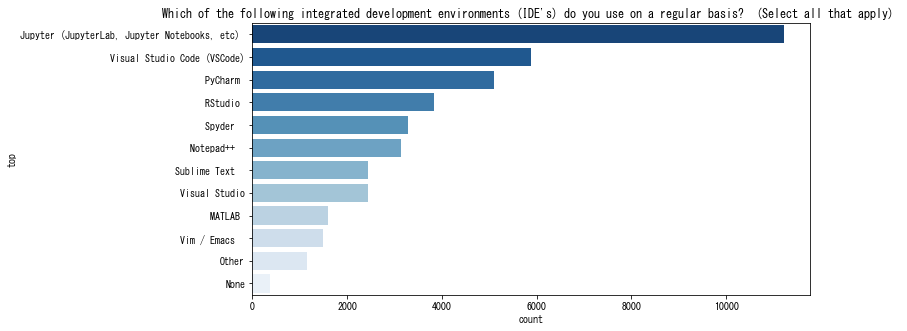

In [51]:
show_multiple_choice_barplot_by_qno("Q9")

## Cross table

<AxesSubplot:xlabel='Q1'>

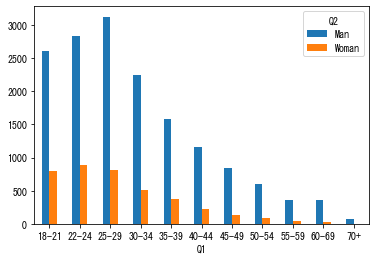

In [52]:
q1q2 = pd.crosstab(answer["Q1"], answer["Q2"])
q1q2[["Man","Woman"]].plot.bar(rot=0)

In [53]:
q1q2[["Man","Woman"]]

Q2      Man  Woman
Q1                
18-21  2611    796
22-24  2838    886
25-29  3128    819
30-34  2246    504
35-39  1581    368
40-44  1153    222
45-49   840    126
50-54   605     81
55-59   353     45
60-69   362     29
70+      72      2

<AxesSubplot:title={'center':'Age & Gender'}, ylabel='Q1'>

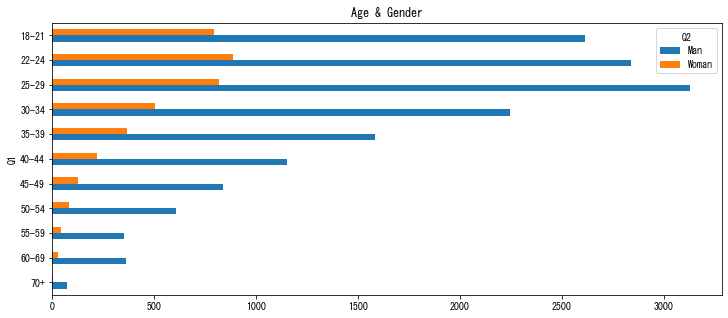

In [54]:
q1q2[["Man","Woman"]].sort_index(ascending=False).plot.barh(figsize=(12,5), title="Age & Gender")

<AxesSubplot:xlabel='count', ylabel='Q1'>

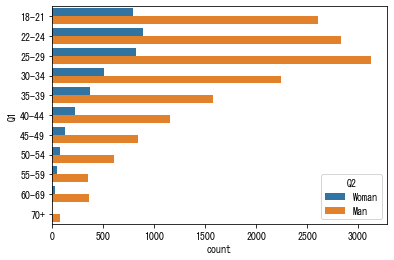

In [55]:
hue_order= ["Woman","Man"]
sns.countplot(data=answer.sort_values("Q1"), y="Q1", hue="Q2", hue_order=hue_order)

Text(0.5, 1.0, 'Age & Gender')

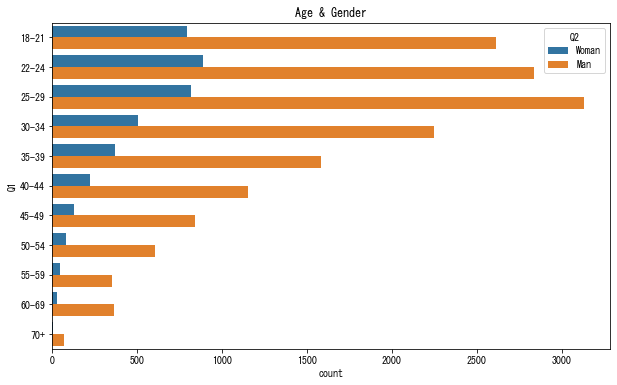

In [56]:
order= ['Woman', 'Man']
plt.figure(figsize=(10,6))
sns.countplot(data=answer.sort_values("Q1"), y="Q1", hue="Q2", hue_order=order).set_title("Age & Gender")

## multi cross

In [57]:
q7_cols = answer.filter(regex="Q7").describe().loc["top"].tolist()

In [58]:
q2q7 = answer.filter(regex="Q7|Q2$")
q2q7_count = q2q7.groupby("Q2").count()
q2q7_count.columns = q7_cols

In [59]:
q2q7_count

Python     R   SQL     C   C++  Java  Javascript  \
Q2                                                                          
Man                       12530  3299  5940  2552  3063  2641        2487   
Nonbinary                    41    14    20     8    10     1           6   
Prefer not to say           182    48    97    36    43    42          41   
Prefer to self-describe      41     8    18    12    13     9          12   
Woman                      2736   908  1460   707   698   674         449   

                         Julia  Swift  Bash  MATLAB  None  Other  
Q2                                                                
Man                        238    171  1561    1679   149   1634  
Nonbinary                    1      2    10       7     0      7  
Prefer not to say            5      4    31      28     6     31  
Prefer to self-describe      2      1    10       6     0      7  
Woman                       16     20   164     497    51    266

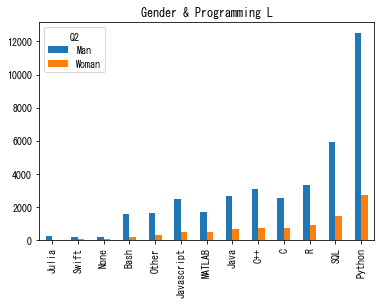

In [60]:
g = q2q7_count.loc[["Man","Woman"]].T.sort_values("Woman").plot.bar(title="Gender & Programming L")

In [61]:
q2q7_t = q2q7_count.T
q2q7_t

Q2            Man  Nonbinary  Prefer not to say  Prefer to self-describe  \
Python      12530         41                182                       41   
R            3299         14                 48                        8   
SQL          5940         20                 97                       18   
C            2552          8                 36                       12   
C++          3063         10                 43                       13   
Java         2641          1                 42                        9   
Javascript   2487          6                 41                       12   
Julia         238          1                  5                        2   
Swift         171          2                  4                        1   
Bash         1561         10                 31                       10   
MATLAB       1679          7                 28                        6   
None          149          0                  6                        0   
Other        1634          7                 31                        7   

Q2          Woman  
Python       2736  
R             908  
SQL          1460  
C             707  
C++           698  
Java          674  
Javascript    449  
Julia          16  
Swift          20  
Bash          164  
MATLAB        497  
None           51  
Other         266

In [62]:
q2q7_count

Python     R   SQL     C   C++  Java  Javascript  \
Q2                                                                          
Man                       12530  3299  5940  2552  3063  2641        2487   
Nonbinary                    41    14    20     8    10     1           6   
Prefer not to say           182    48    97    36    43    42          41   
Prefer to self-describe      41     8    18    12    13     9          12   
Woman                      2736   908  1460   707   698   674         449   

                         Julia  Swift  Bash  MATLAB  None  Other  
Q2                                                                
Man                        238    171  1561    1679   149   1634  
Nonbinary                    1      2    10       7     0      7  
Prefer not to say            5      4    31      28     6     31  
Prefer to self-describe      2      1    10       6     0      7  
Woman                       16     20   164     497    51    266

In [63]:
q2q7["Q7_Part_1"].value_counts()
# sns.barplot(data=q2q7, x="Q2",)

Python    15530
Name: Q7_Part_1, dtype: int64

In [64]:
answer.filter(regex="Q7").describe().loc[["top","count"]].T

top  count
Q7_Part_1       Python  15530
Q7_Part_2            R   4277
Q7_Part_3          SQL   7535
Q7_Part_4            C   3315
Q7_Part_5          C++   3827
Q7_Part_6         Java   3367
Q7_Part_7   Javascript   2995
Q7_Part_8        Julia    262
Q7_Part_9        Swift    198
Q7_Part_10        Bash   1776
Q7_Part_11      MATLAB   2217
Q7_Part_12        None    206
Q7_OTHER         Other   1945

In [65]:
q2q7.groupby("Q2").count()

Q7_Part_1  Q7_Part_2  Q7_Part_3  Q7_Part_4  \
Q2                                                                    
Man                          12530       3299       5940       2552   
Nonbinary                       41         14         20          8   
Prefer not to say              182         48         97         36   
Prefer to self-describe         41          8         18         12   
Woman                         2736        908       1460        707   

                         Q7_Part_5  Q7_Part_6  Q7_Part_7  Q7_Part_8  \
Q2                                                                    
Man                           3063       2641       2487        238   
Nonbinary                       10          1          6          1   
Prefer not to say               43         42         41          5   
Prefer to self-describe         13          9         12          2   
Woman                          698        674        449         16   

                         Q7_Part_9  Q7_Part_10  Q7_Part_11  Q7_Part_12  \
Q2                                                                       
Man                            171        1561        1679         149   
Nonbinary                        2          10           7           0   
Prefer not to say                4          31          28           6   
Prefer to self-describe          1          10           6           0   
Woman                           20         164         497          51   

                         Q7_OTHER  
Q2                                 
Man                          1634  
Nonbinary                       7  
Prefer not to say              31  
Prefer to self-describe         7  
Woman                         266

In [66]:
a = q2q7_count.loc[["Man","Woman"]].T
a

Q2            Man  Woman
Python      12530   2736
R            3299    908
SQL          5940   1460
C            2552    707
C++          3063    698
Java         2641    674
Javascript   2487    449
Julia         238     16
Swift         171     20
Bash         1561    164
MATLAB       1679    497
None          149     51
Other        1634    266

<AxesSubplot:>

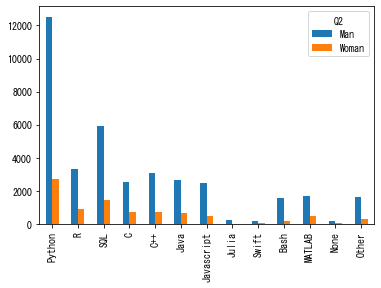

In [67]:
a.plot.bar()

## Define single choice plot

In [68]:
def show_plot_by_pno(qno):
    if qno in question.index:
        make_counts(qno)
    else:
        show_multiple_choice_barplot_by_qno(qno)

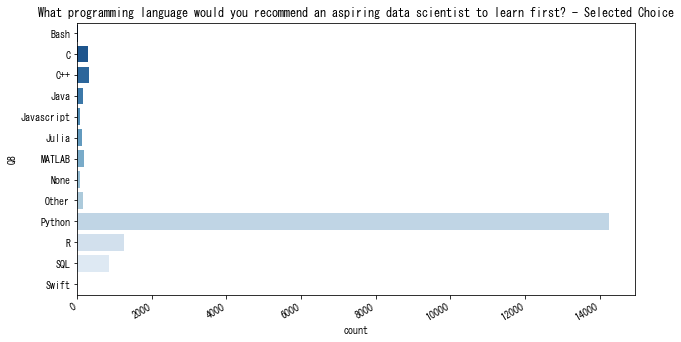

In [69]:
show_plot_by_pno("Q8")

# Q9.Which of the following integrated development environments (IDE's) do you use on a regular basis?
(Select all that apply)

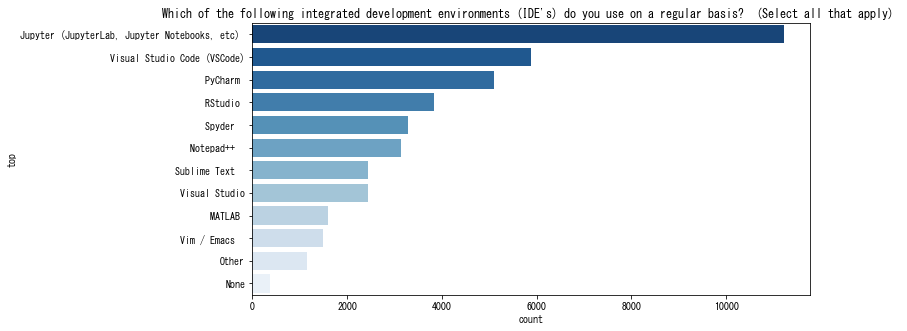

In [70]:
show_plot_by_pno("Q9")

# Q10.Which of the following hosted notebook products do you use on a regular basis? 

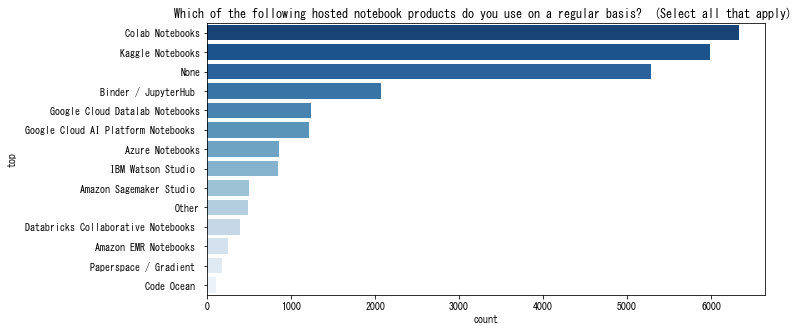

In [71]:
show_plot_by_pno("Q10")

# Q11.What type of computing platform do you use most often for your data science projects?

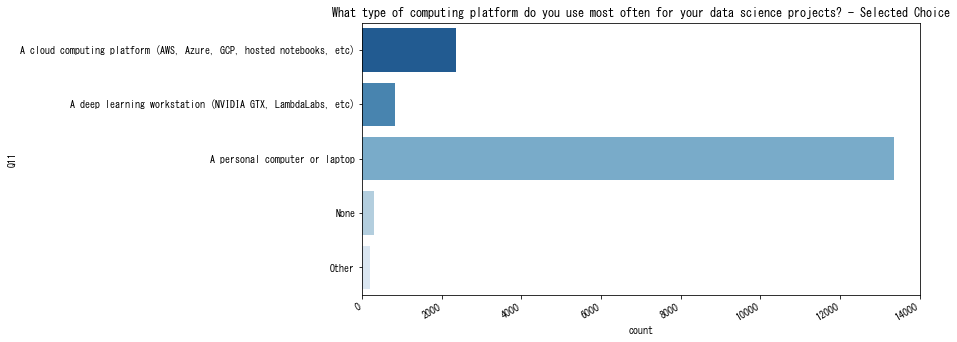

In [72]:
show_plot_by_pno("Q11")

# Q12.Which types of specialized hardware do you use on a regular basis? 

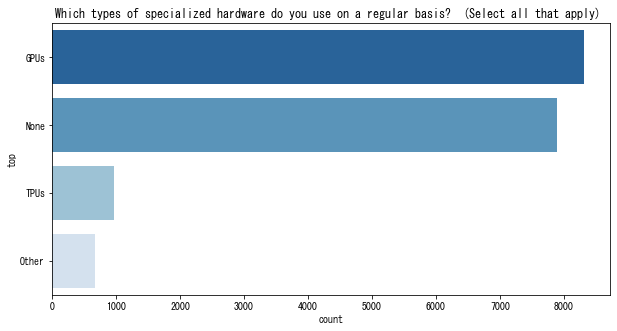

In [73]:
show_plot_by_pno("Q12")


# Q13. Approximately how many times have you used a TPU 

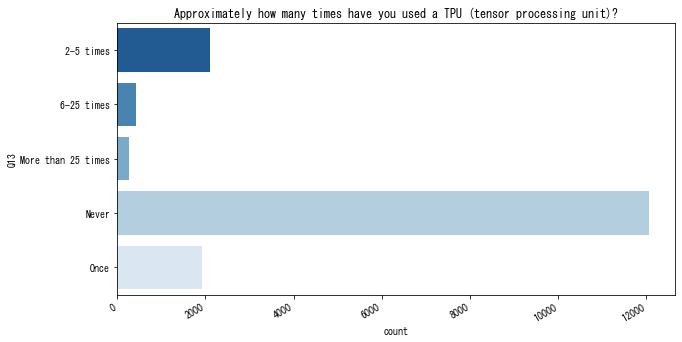

In [74]:
show_plot_by_pno("Q13")

# Q24.What is your current yearly compensation (approximate $USD)?

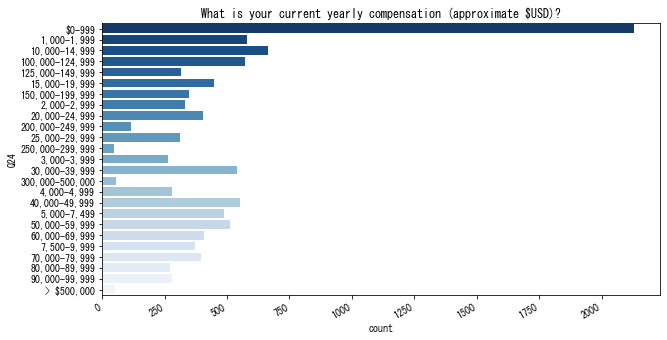

In [75]:
show_plot_by_pno("Q24")

In [76]:
q24_count = answer["Q24"].value_counts().reset_index()
q24_count.columns = ["range","count"]
q24_count.sort_values("range")

range  count
0            $0-999   2128
2       1,000-1,999    581
1     10,000-14,999    665
3   100,000-124,999    573
15  125,000-149,999    315
8     15,000-19,999    449
13  150,000-199,999    347
14      2,000-2,999    330
10    20,000-24,999    404
21  200,000-249,999    115
16    25,000-29,999    310
24  250,000-299,999     48
20      3,000-3,999    264
5     30,000-39,999    540
22  300,000-500,000     55
18      4,000-4,999    279
4     40,000-49,999    552
7       5,000-7,499    488
6     50,000-59,999    510
9     60,000-69,999    408
12      7,500-9,999    371
11    70,000-79,999    394
19    80,000-89,999    273
17    90,000-99,999    280
23       > $500,000     50

In [77]:
q24_count["min"] = q24_count["range"].str.split("-", expand=True)[0]
q24_count["max"] = q24_count["range"].str.split("-", expand=True)[1]
q24_count["min"]= q24_count["min"].str.replace(",|\$|>","").astype(int)

In [78]:
q24_count = q24_count.sort_values("min")
q24_count

range  count     min      max
0            $0-999   2128       0      999
2       1,000-1,999    581    1000    1,999
14      2,000-2,999    330    2000    2,999
20      3,000-3,999    264    3000    3,999
18      4,000-4,999    279    4000    4,999
7       5,000-7,499    488    5000    7,499
12      7,500-9,999    371    7500    9,999
1     10,000-14,999    665   10000   14,999
8     15,000-19,999    449   15000   19,999
10    20,000-24,999    404   20000   24,999
16    25,000-29,999    310   25000   29,999
5     30,000-39,999    540   30000   39,999
4     40,000-49,999    552   40000   49,999
6     50,000-59,999    510   50000   59,999
9     60,000-69,999    408   60000   69,999
11    70,000-79,999    394   70000   79,999
19    80,000-89,999    273   80000   89,999
17    90,000-99,999    280   90000   99,999
3   100,000-124,999    573  100000  124,999
15  125,000-149,999    315  125000  149,999
13  150,000-199,999    347  150000  199,999
21  200,000-249,999    115  200000  249,999
24  250,000-299,999     48  250000  299,999
22  300,000-500,000     55  300000  500,000
23       > $500,000     50  500000     None

<AxesSubplot:xlabel='count', ylabel='range'>

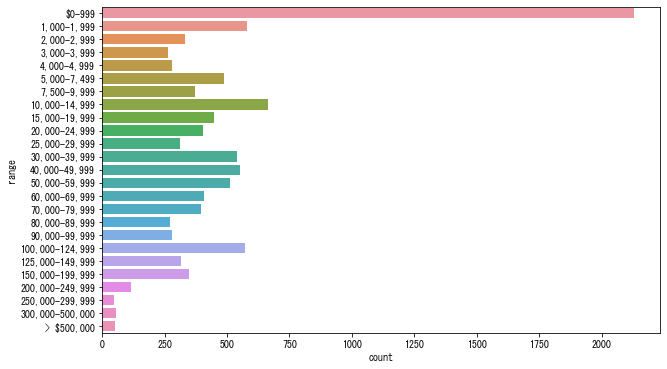

In [79]:
plt.figure(figsize=(10,6))
sns.barplot(data=q24_count, y="range", x="count")

In [80]:
q3_usa = answer[answer["Q3"].isin(["United States of America"])]
q3_usa

Time from Start to Finish (seconds)     Q1     Q2  \
2                                  289287  30-34    Man   
4                                     507  30-34    Man   
12                                    742  35-39    Man   
25                                    571  50-54    Man   
26                                    723  25-29  Woman   
...                                   ...    ...    ...   
19994                                 148  45-49    Man   
20001                                 653  45-49    Man   
20007                                 487  45-49    Man   
20021                                 238  18-21  Woman   
20026                                1158  22-24    Man   

                             Q3  \
2      United States of America   
4      United States of America   
12     United States of America   
25     United States of America   
26     United States of America   
...                         ...   
19994  United States of America   
20001  United States of America   
20007  United States of America   
20021  United States of America   
20026  United States of America   

                                                      Q4  \
2                                        Master’s degree   
4                                        Master’s degree   
12                                       Doctoral degree   
25                                       Master’s degree   
26                                       Master’s degree   
...                                                  ...   
19994  Some college/university study without earning ...   
20001                                  Bachelor’s degree   
20007                                    Doctoral degree   
20021                                  Bachelor’s degree   
20026                                    Master’s degree   

                           Q5                         Q6 Q7_Part_1 Q7_Part_2  \
2               Data Engineer                 5-10 years    Python         R   
4              Data Scientist                 5-10 years    Python       NaN   
12         Research Scientist                  1-2 years       NaN         R   
25          Software Engineer                  20+ years    Python       NaN   
26                    Student                  1-2 years    Python         R   
...                       ...                        ...       ...       ...   
19994  Currently not employed  I have never written code       NaN       NaN   
20001       Software Engineer                  20+ years    Python       NaN   
20007       Software Engineer                  20+ years    Python       NaN   
20021                 Student                  3-5 years    Python       NaN   
20026                 Student                  1-2 years    Python       NaN   

      Q7_Part_3  ... Q35_B_Part_4 Q35_B_Part_5 Q35_B_Part_6 Q35_B_Part_7  \
2           SQL  ...          NaN          NaN          NaN          NaN   
4           SQL  ...          NaN          NaN          NaN          NaN   
12          NaN  ...          NaN          NaN          NaN          NaN   
25          NaN  ...          NaN          NaN          NaN          NaN   
26          NaN  ...          NaN          NaN          NaN          NaN   
...         ...  ...          ...          ...          ...          ...   
19994       NaN  ...          NaN          NaN          NaN          NaN   
20001       SQL  ...          NaN          NaN          NaN          NaN   
20007       NaN  ...          NaN          NaN          NaN          NaN   
20021       NaN  ...          NaN          NaN          NaN          NaN   
20026       NaN  ...          NaN          NaN          NaN          NaN   

      Q35_B_Part_8 Q35_B_Part_9 Q35_B_Part_10 Q35_B_OTHER   Q1_1   Q4_1  
2              NaN          NaN           NaN         NaN  30-34  False  
4              NaN          NaN           NaN         NaN  30-34  False  
12             NaN          NaN           NaN         NaN  

In [81]:
q24_cols = q24_count.range.tolist()

<AxesSubplot:xlabel='count', ylabel='Q24'>

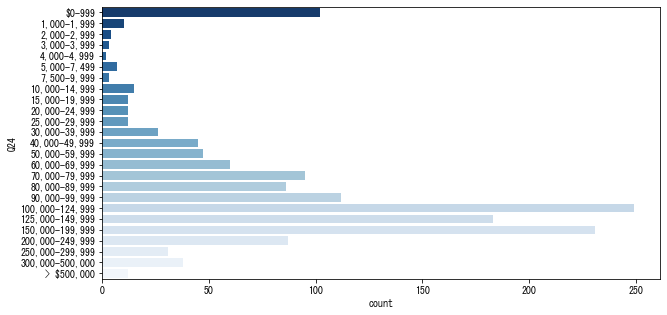

In [82]:
plt.figure(figsize=(10,5))
sns.countplot(data=q3_usa, y="Q24", order=q24_cols, palette="Blues_r")

<AxesSubplot:xlabel='count', ylabel='Q24'>

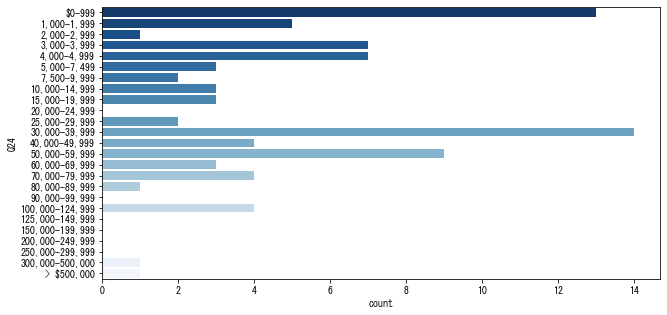

In [83]:
q3_korea = answer[answer["Q3"].isin(["South Korea"])]
plt.figure(figsize=(10,5))
sns.countplot(data=q3_korea, y="Q24", order=q24_cols, palette="Blues_r")

In [84]:
def judge(ex):
    if ex == "India":
        return "India"
    else:
        return "other"

In [85]:
answer.loc[:, "Q3_1"] = answer.loc[:, "Q3"].apply(judge)
answer["Q3_1"]

1        other
2        other
3        other
4        other
5        other
         ...  
20032    other
20033    other
20034    other
20035    India
20036    other
Name: Q3_1, Length: 20036, dtype: object

<AxesSubplot:xlabel='count', ylabel='Q24'>

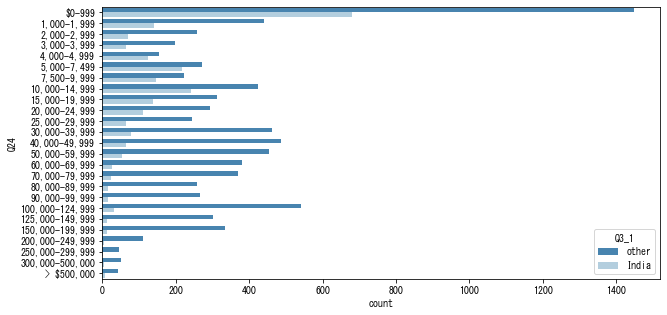

In [86]:
plt.figure(figsize=(10,5))
sns.countplot(data=answer, y="Q24", order=q24_cols, palette="Blues_r", hue="Q3_1")

In [87]:
answer["Q3_1"].value_counts()

other    14185
India     5851
Name: Q3_1, dtype: int64

Q25. Approximately how much money have you (or your team) spent on machine learning and/or cloud
computing services at home (or at work) in the past 5 years

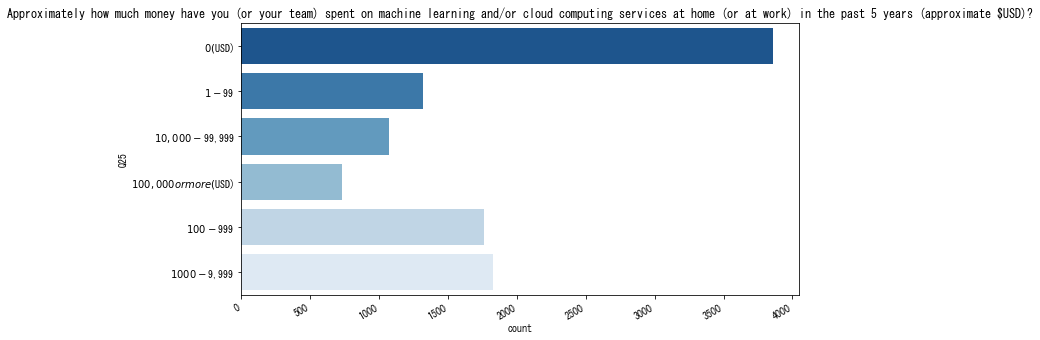

In [88]:
show_plot_by_pno("Q25")

Q26.Cloud computing platforms

Q26-A.Which of the following cloud computing platforms do you use on a regular basis?

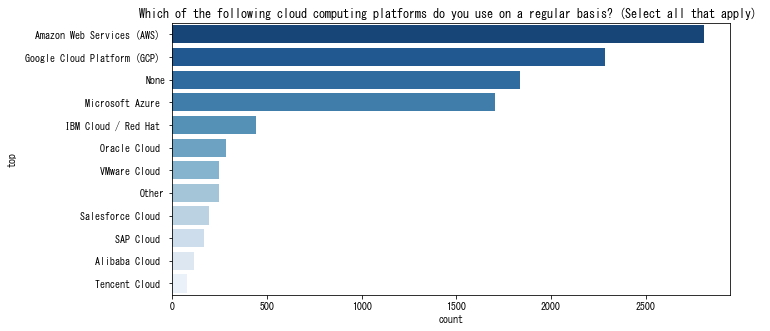

In [90]:
show_plot_by_pno("Q26_A")

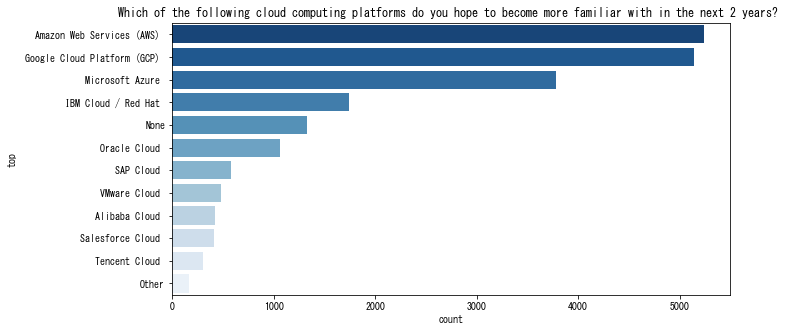

In [91]:
show_plot_by_pno("Q26_B")

Q27-A.Do you use any of the following cloud computing products on a regular basis?

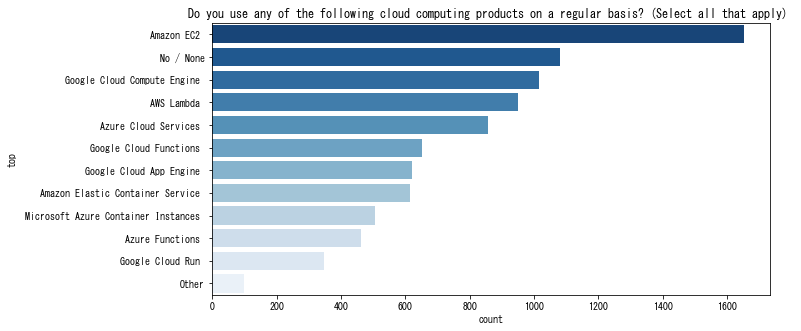

In [92]:
show_plot_by_pno("Q27_A")

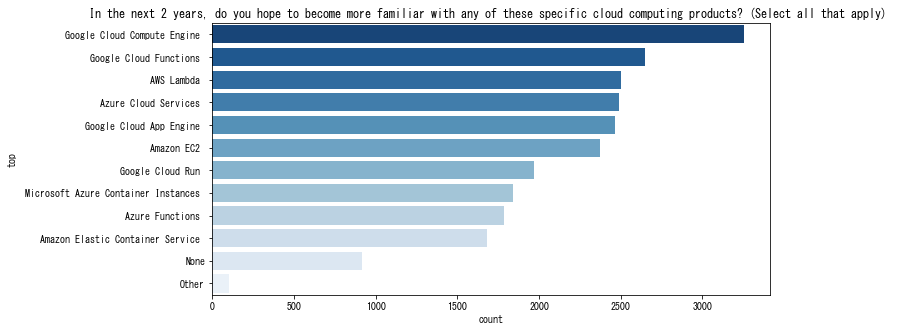

In [93]:
show_plot_by_pno("Q27_B")

Q28-A.Do you use any of the following machine learning products on a regular basis?

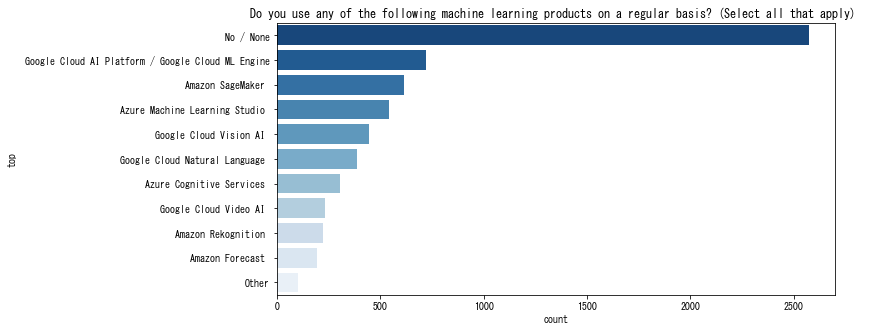

In [94]:
show_plot_by_pno("Q28_A")

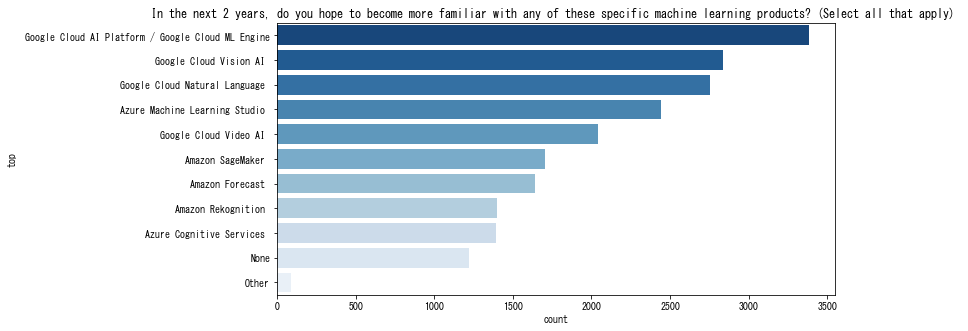

In [95]:
show_plot_by_pno("Q28_B")

Q29-A.Which of the following big data products (relational databases, data warehouses, data lakes, or
similar) do you use on a regular basis?

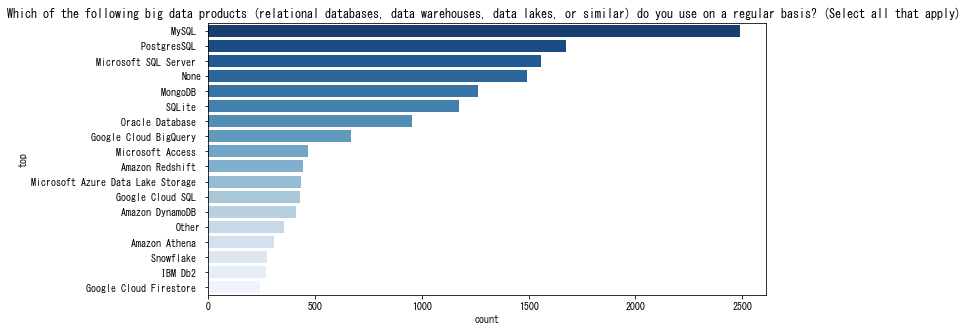

In [96]:
show_plot_by_pno("Q29_A")

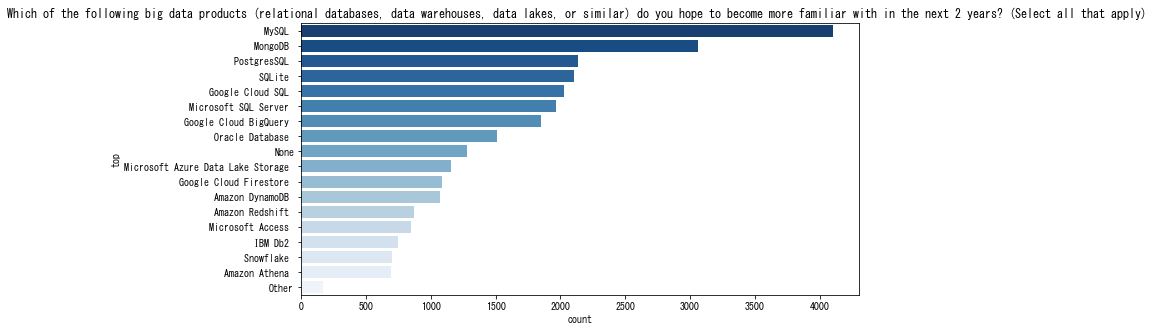

In [97]:
show_plot_by_pno("29_B")

Q30.Which of the following big data products (relational database, data warehouse, data lake, or similar)
do you use most often?

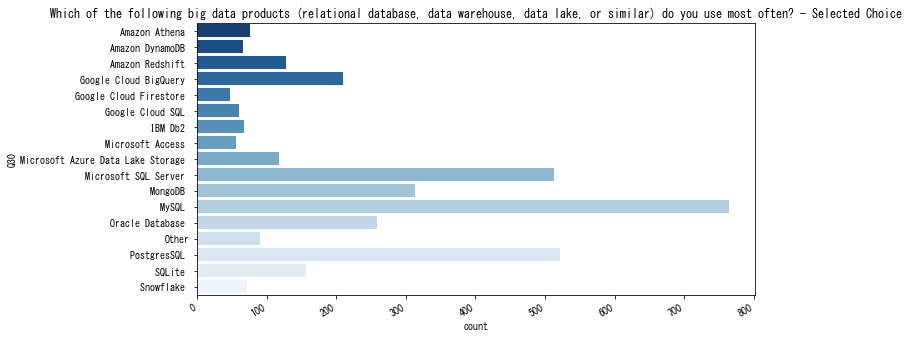

In [98]:
show_plot_by_pno("Q30")

Q31-A.Which of the following business intelligence tools do you use on a regular basis?

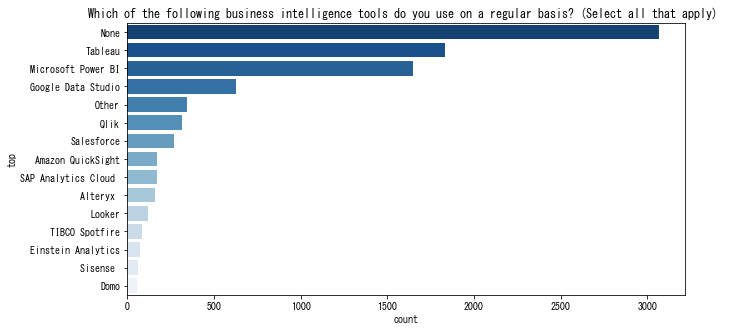

In [99]:
show_plot_by_pno("Q31_A")

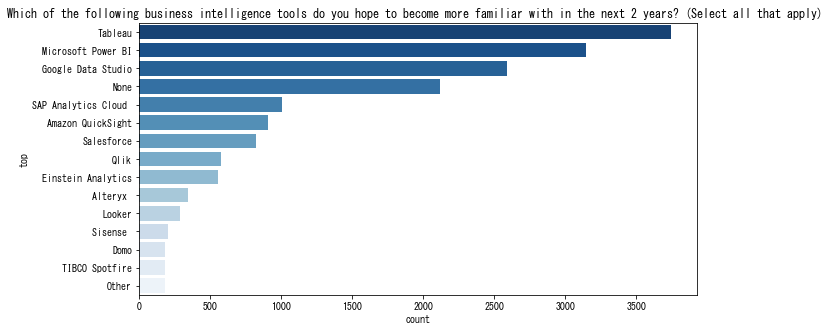

In [100]:
show_plot_by_pno("Q31_B")

Q32.Which of the following business intelligence tools do you use most often?

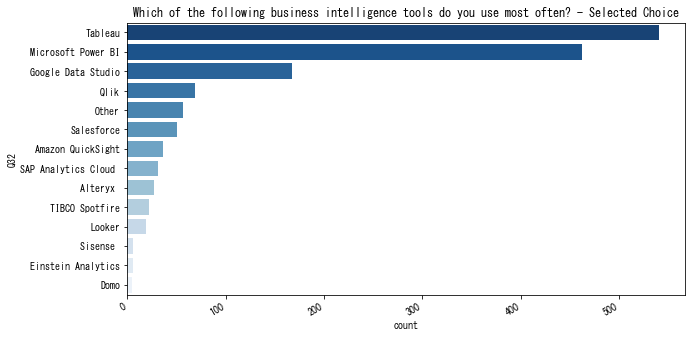

In [122]:
show_plot_by_pno("Q32")

Q33-A.Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?

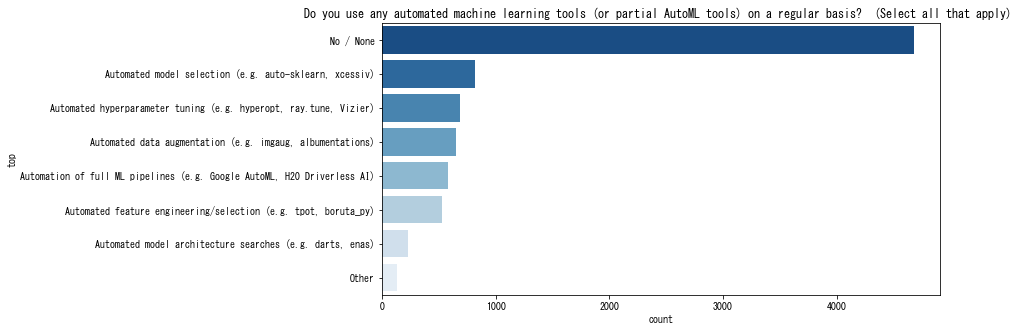

In [123]:
show_plot_by_pno("Q33_A")

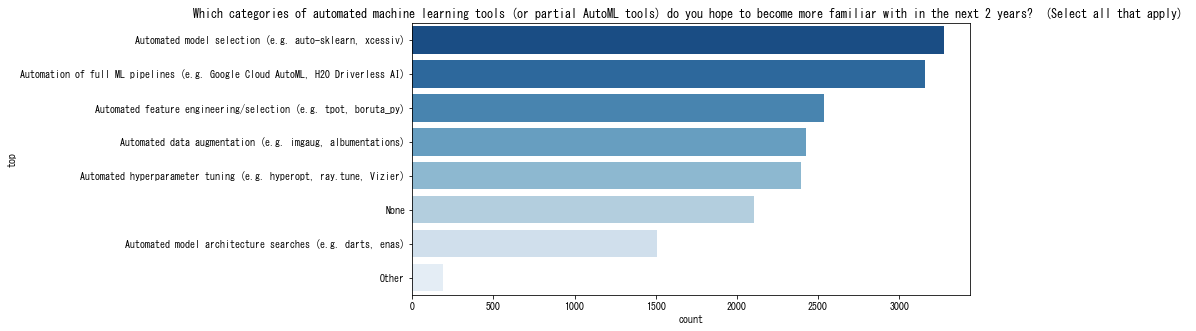

In [124]:
show_plot_by_pno("Q33_B")

Q34-A.Which of the following automated machine learning tools (or partial AutoML tools) do you use on a
regular basis?

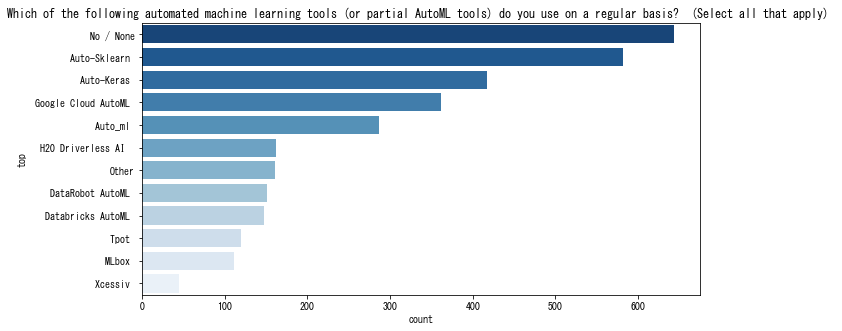

In [125]:
show_plot_by_pno("Q34_A")

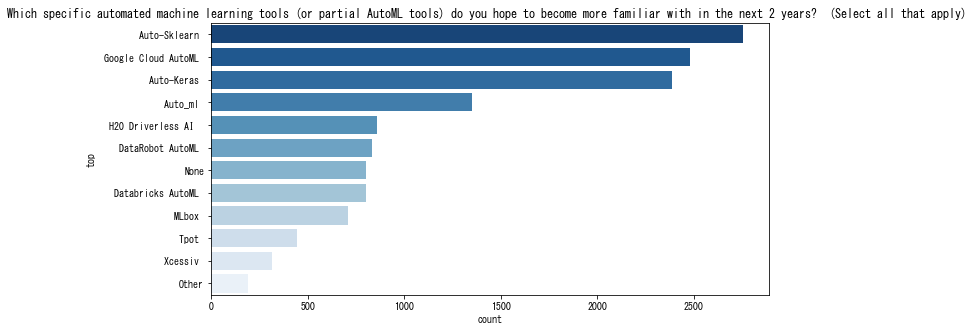

In [126]:
show_plot_by_pno("Q34_B")

Q35-A.Do you use any tools to help manage machine learning experiments? 

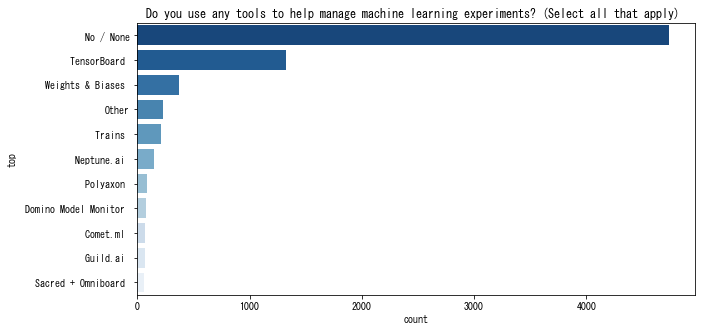

In [128]:
show_plot_by_pno("Q35_A")

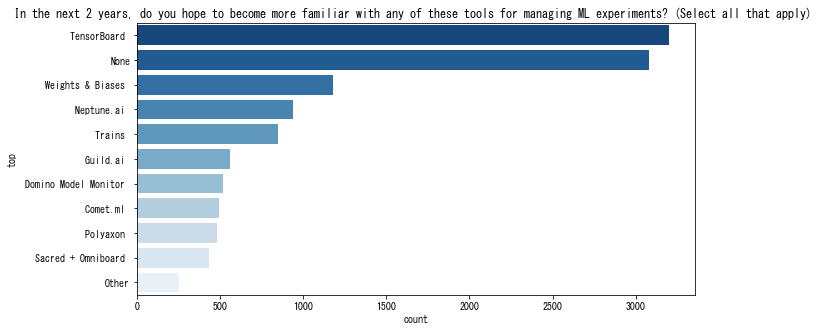

In [129]:
show_plot_by_pno("Q35_B")

Q36.Where do you publicly share or deploy your data analysis or machine learning applications?

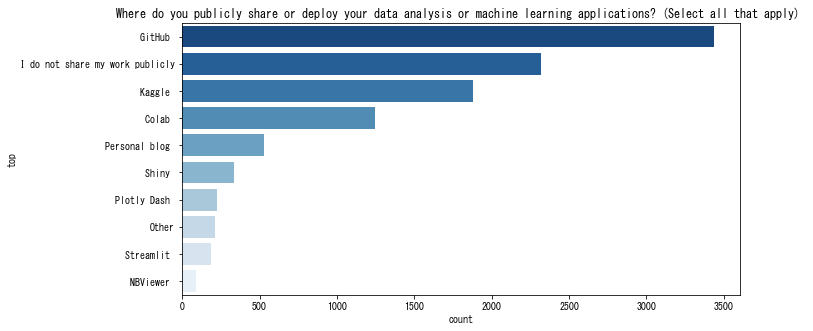

In [130]:
show_plot_by_pno("Q36")

Q37.On which platforms have you begun or completed data science courses?

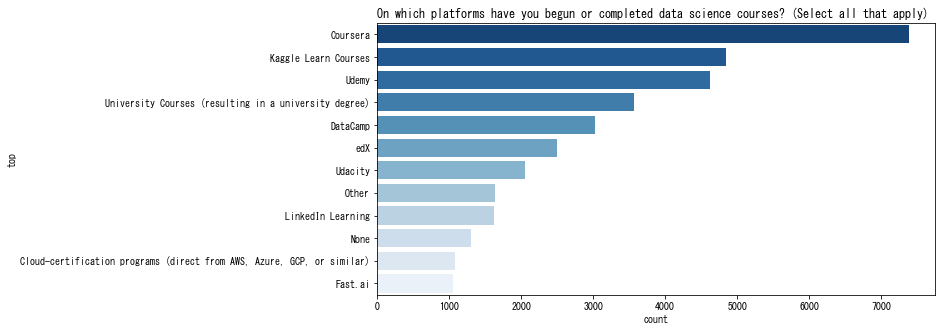

In [131]:
show_plot_by_pno("Q37")

Q38.What is the primary tool that you use at work or school to analyze data?

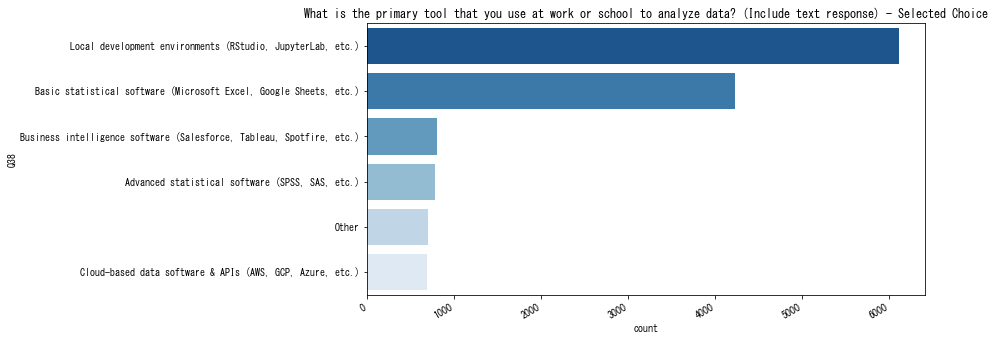

In [132]:
show_plot_by_pno("Q38")

Q39.Who/what are your favorite media sources that report on data science topics? 

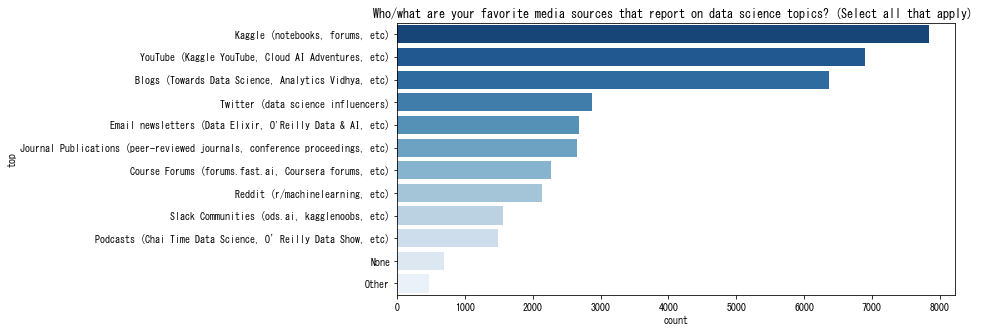

In [133]:
show_plot_by_pno("Q39")